## Prediction using Decision Tree Algorithm

### Task 3:- For a given iris dataset create a decision tree classifier and visualize it graphically

Submitted By - Unnati Soni

**Import the dataset**

In [55]:
from sklearn import datasets
import pandas as pd

In [7]:
df = pd.read_csv(r"/Iris.csv")

#### check the dataset

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#shape of the dataset
df.shape    

(150, 6)

In [10]:
#column names in the dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
#checking the missing value in the dataset
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [13]:
#taking the quick summary of the data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Visualization

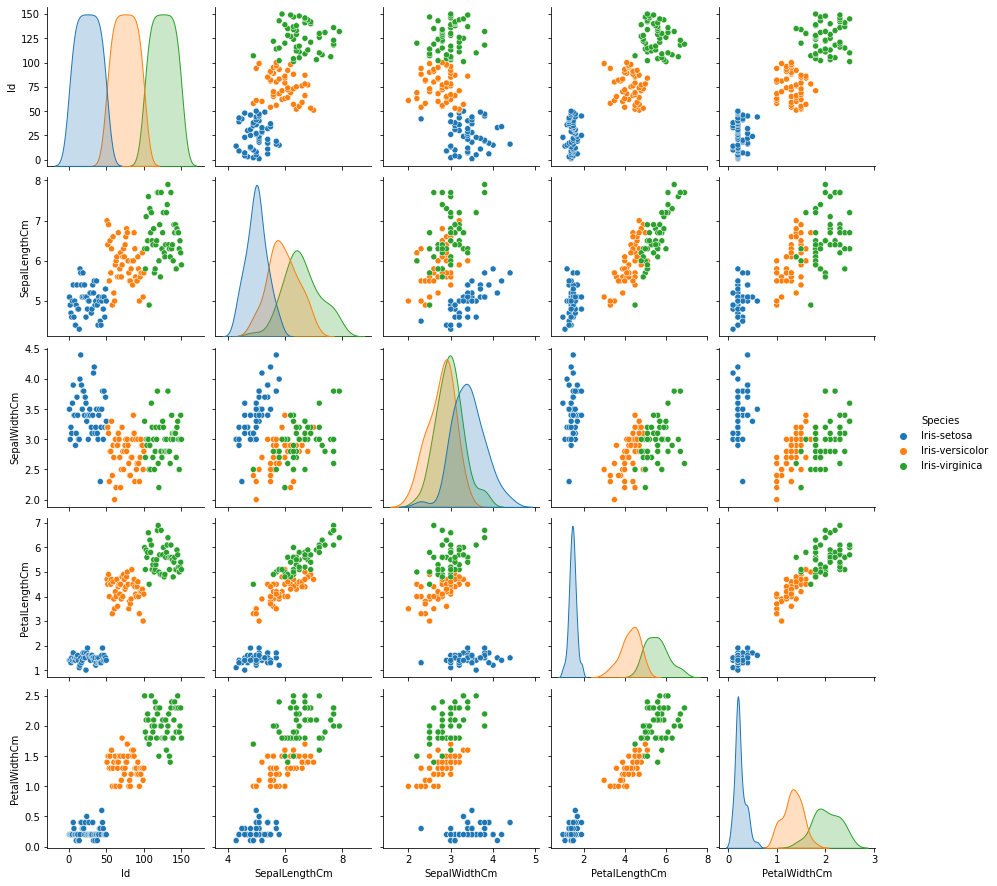

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=df,hue="Species")

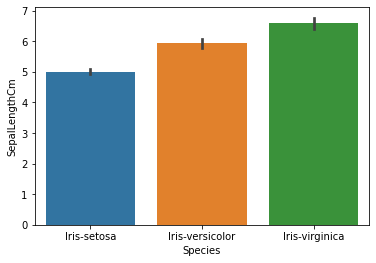

In [15]:
sns.barplot(y=df["SepalLengthCm"],x=df["Species"])

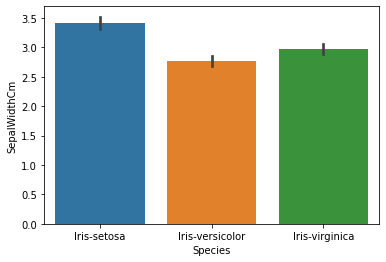

In [16]:
sns.barplot(x=df["Species"],y=df["SepalWidthCm"])

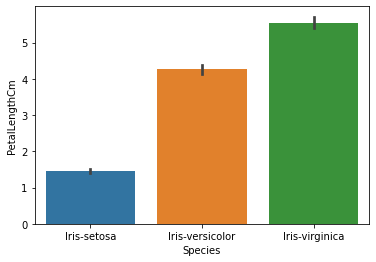

In [17]:
sns.barplot(x=df["Species"],y=df["PetalLengthCm"])

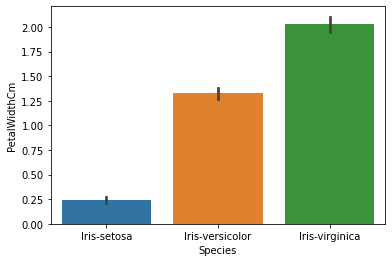

In [18]:
sns.barplot(x=df["Species"],y=df["PetalWidthCm"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

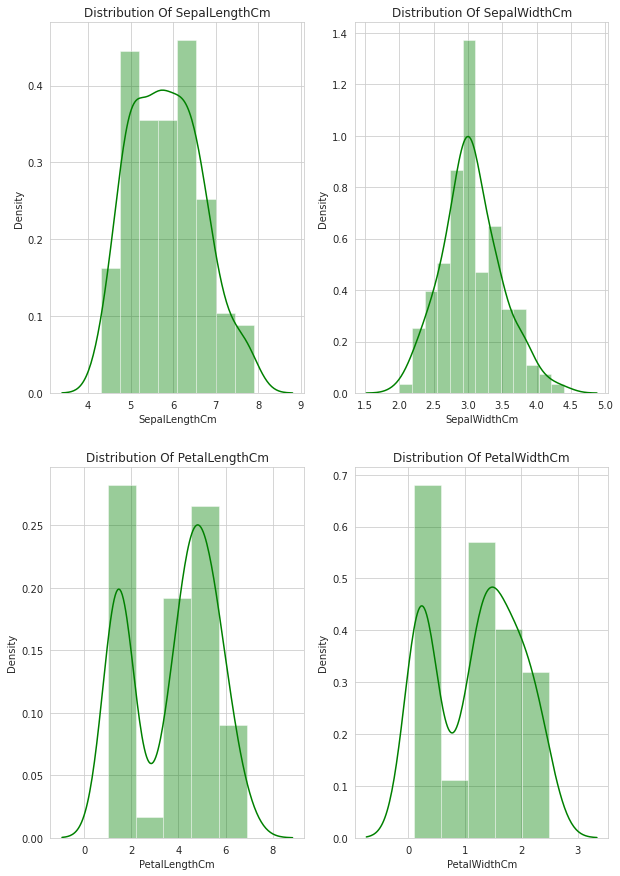

In [54]:
#Probability Distribution
fig,ax =plt.subplots(nrows=2, ncols=2, figsize=(10,15))
sns.set_style('whitegrid')
col = df.columns
index=1
for i in range(2):
    for j in range(2):
        sns.distplot(df[col[index]], ax=ax[i][j], color='green').set_title("Distribution Of "+col[index])
        index=index+1

### Correlation between the variables

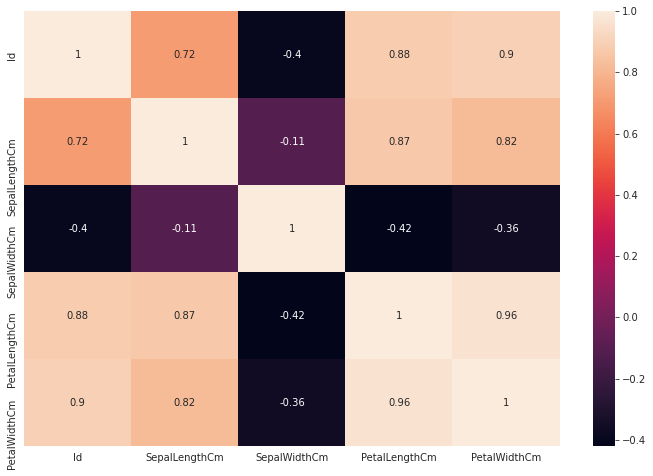

In [20]:
#Coorelation between all the features
fig= plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True)

### importing the libraries for making model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Feature Selection

In [25]:
#split the dataset in features and target variables
x= df.iloc[:,[1,2,3,4]]
y= df.iloc[:,5]

### Splitting the dataset into testing and training datasets

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Building the  Decision Tree Model

In [37]:
model = DecisionTreeClassifier(random_state=1234)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

### **Score of the model**

In [38]:
model.score(x_test,y_test)

1.0

### predicting the output for testing dataset

In [39]:
y_pred= model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

### Comparing the predicted value and the real value of test dataset

In [40]:
pre=pd.DataFrame([y_pred,y_test],index=["y_predicted","y_test"]).transpose()
pre

,y_predicted,y_test
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-versicolor
5,Iris-virginica,Iris-virginica
6,Iris-versicolor,Iris-versicolor
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-virginica,Iris-virginica


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix,classification_report

### Visualize the confusion matrix 

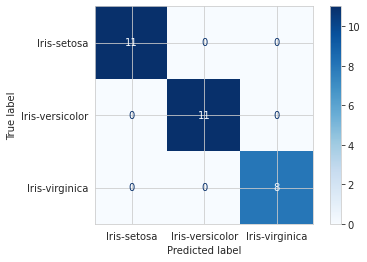

In [42]:
plot_confusion_matrix(model,x_test,y_test,display_labels=y.unique(),cmap=plt.cm.Blues)

### Evaluating the model

In [43]:
print("accuracy score is ",accuracy_score(y_test,y_pred))

accuracy score is  1.0


In [44]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [45]:

from sklearn.tree import export_text
from sklearn import tree

In [53]:
print(export_text(model))

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



## Visualize Decision Tree

In [48]:
import graphviz

In [50]:
dot_data= tree.export_graphviz(model,out_file=None,feature_names=x.columns,class_names=y.unique(),filled=True)

In [51]:
graph= graphviz.Source(dot_data, format="png")

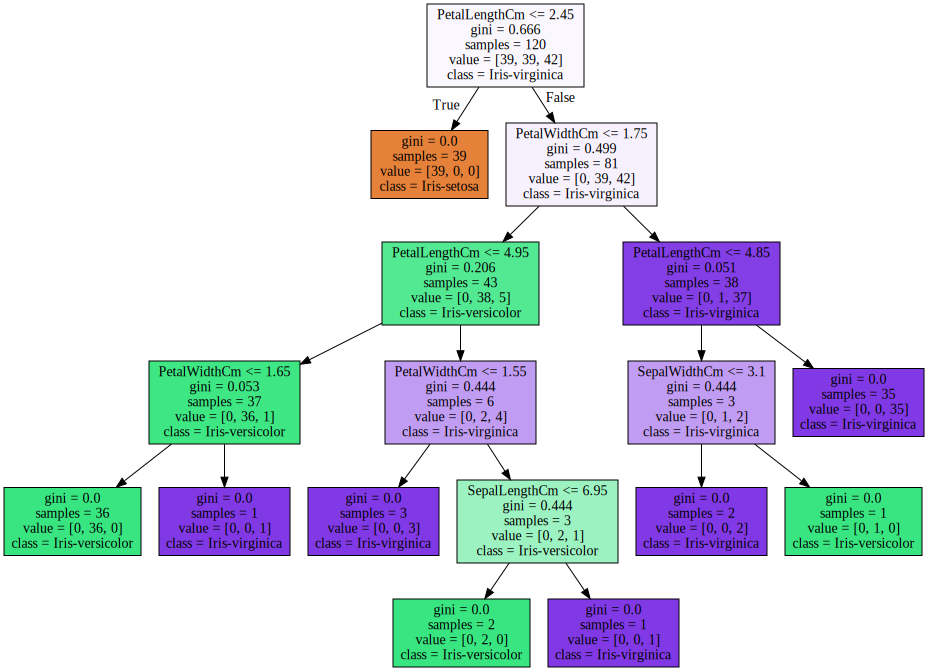

In [52]:
graph